## Lab session 5

5. Neural Network (with no hidden layers) applied to Regression

To setup our nn you need to perform the following imports:

In [67]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In this example you will use a simple dataset wich consists of two arrays (X and y), then separate the dataset as usual.

Text(0.5, 1.0, 'Dataset')

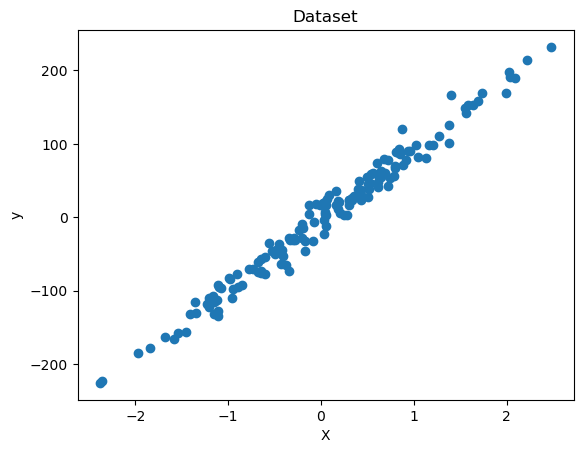

In [68]:
X, y = datasets.make_regression(n_samples=150, n_features=1, noise=15, random_state=4)
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Dataset')

Remember that NNs takes tensors as input, so always perform a conversion and reshape numpy arrays.

In [69]:
X = torch.from_numpy(X.astype(np.float32)).view(-1, 1)
y = torch.from_numpy(y.astype(np.float32)).view(-1, 1)

The size determines the numbers of values.

In [70]:
input_size = 1
output_size = 1

Since we want to train a single layer NN, we execute the following instruction.

In [71]:
model = nn.Linear(input_size, output_size)

To train the model properly, you will need to define the loss function, and an optimizer to reduce the loss.

In [72]:
learning_rate = 0.001
l = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Now you train the NN:
1. Forward feed: in this step, you are calculating the prediction (y_pred) using initial weights and features (X).
2. Loss phase: we measure the loss for each epochs using mean squared error
3. Backpropagation: gardients are calulated
4. Step: weights are updated for every epoch
5. Gardient clear: gardients are cleared to make new ones

In [73]:
num_epochs = 2000

for epoch in range(num_epochs): # Forward feed
    y_pred = model(X.requires_grad_())

    loss = l(y_pred, y) # Calculate the loss

    loss.backward() # Backward propagation: calculate gradients

    optimizer.step() # Update the weights

    optimizer.zero_grad() # Clear the gardients from last step loss.backward()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 8515.3798828125
epoch 1, loss 8484.587890625
epoch 2, loss 8453.9072265625
epoch 3, loss 8423.3427734375
epoch 4, loss 8392.8896484375
epoch 5, loss 8362.55078125
epoch 6, loss 8332.3232421875
epoch 7, loss 8302.20703125
epoch 8, loss 8272.205078125
epoch 9, loss 8242.3115234375
epoch 10, loss 8212.5302734375
epoch 11, loss 8182.857421875
epoch 12, loss 8153.294921875
epoch 13, loss 8123.84326171875
epoch 14, loss 8094.4990234375
epoch 15, loss 8065.26416015625
epoch 16, loss 8036.1376953125
epoch 17, loss 8007.119140625
epoch 18, loss 7978.20751953125
epoch 19, loss 7949.40234375
epoch 20, loss 7920.705078125
epoch 21, loss 7892.11328125
epoch 22, loss 7863.62744140625
epoch 23, loss 7835.24658203125
epoch 24, loss 7806.9716796875
epoch 25, loss 7778.7998046875
epoch 26, loss 7750.734375
epoch 27, loss 7722.77099609375
epoch 28, loss 7694.91259765625
epoch 29, loss 7667.15673828125
epoch 30, loss 7639.50341796875
epoch 31, loss 7611.95166015625
epoch 32, loss 7584.502441

Predicted values are calculated.

In [74]:
predicted = model(X).detach().numpy()

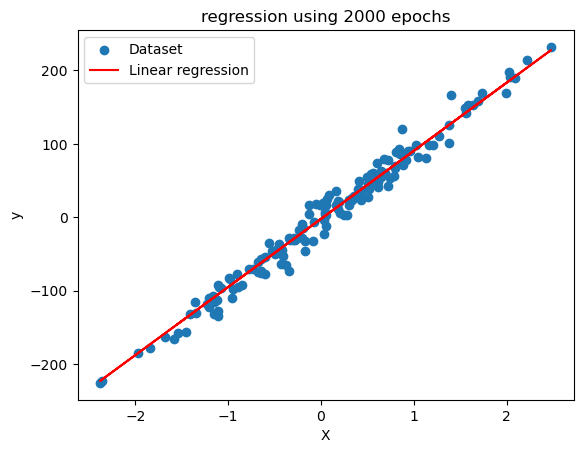

In [75]:
plt.scatter(X.detach().numpy(), y.detach().numpy(), label='Dataset')
plt.plot(X.detach().numpy(), predicted, color='r', label='Linear regression')
plt.xlabel('X')
plt.ylabel('y')
plt.title('regression using {} epochs'.format(num_epochs))
plt.legend()
plt.show()

Try plotting for 100, 500, 1500, 2000 epochs.

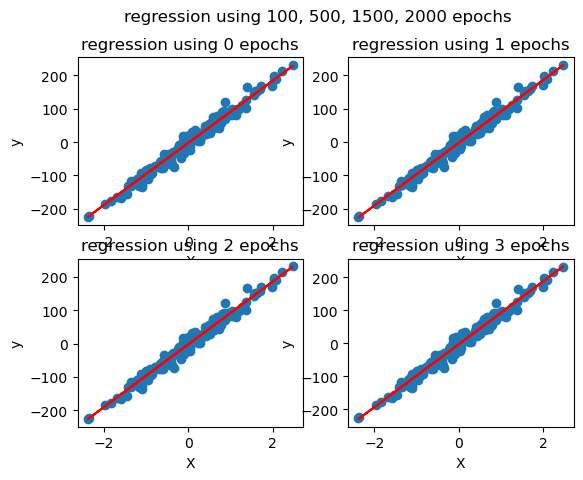

In [76]:
Xdatache = []
Ydatache = []
predictedArray = []
for epoch in range(num_epochs): # Forward feed
    y_pred = model(X.requires_grad_())

    loss = l(y_pred, y) # Calculate the loss

    loss.backward() # Backward propagation: calculate gradients

    optimizer.step() # Update the weights

    optimizer.zero_grad() # Clear the gardients from last step loss.backward()

    if epoch in [100, 500, 1500, 2000]:
        predicted = model(X).detach().numpy()
        Xdatache.append(X.detach().numpy())
        Ydatache.append(y.detach().numpy())
        predictedArray.append(predicted)

        #plt.scatter(X.detach().numpy(), y.detach().numpy(), label='Dataset')
        #plt.plot(X.detach().numpy(), predicted, color='r', label='Linear regression')
        #plt.xlabel('X')
        #plt.ylabel('y')
        #plt.title('regression using {} epochs'.format(epoch))
        #plt.legend()
        #plt.show()

#plt figure pour mettre les trois graphiques en ligne
fig, axes = plt.subplots(2, 2)
fig.suptitle('regression using 100, 500, 1500, 2000 epochs')

for i in range(2):
    for j in range(2):
        axes[i, j].scatter(Xdatache[i+j], Ydatache[i+j], label='Dataset')
        axes[i, j].plot(Xdatache[i+j], predictedArray[i+j], color='r', label='Linear regression')
        axes[i, j].set_xlabel('X')
        axes[i, j].set_ylabel('y')
        axes[i, j].set_title('regression using {} epochs'.format(i*2+j))

plt.show()

## Exercise 1
Plot dynamic curve that show the evolution of regression per epochs using the previous model.

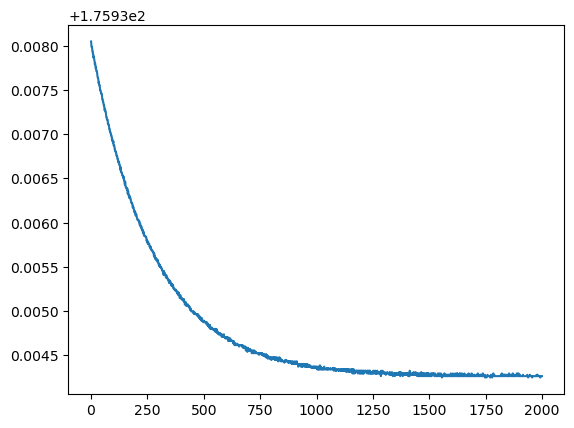

In [77]:
absX = []
ordY = []

for epoch in range(num_epochs): # Forward feed
    y_pred = model(X.requires_grad_())

    loss = l(y_pred, y) # Calculate the loss

    loss.backward() # Backward propagation: calculate gradients

    optimizer.step() # Update the weights

    optimizer.zero_grad() # Clear the gardients from last step loss.backward()

    absX.append(epoch)
    ordY.append(loss.item())

plt.plot(absX, ordY)

6. Neural Network (with hidden layers) applied to Classification

We are gonna create a neural network with hidden layers for classification
We will work on the MNIST database (handwritten digits).
Let's start by importing the right libraries:

In [78]:
import torch
import torchvision #torch package for vision related things
import torch.nn.functional as F #Parameterless functions, like (some) activation functions
import torchvision.datasets as toch_datasets #Standard Datasets
import torchvision.transforms as transforms #Transforms to apply to images
from torch import optim #For optimizers like SGD, Adam, etc.
from torch import nn #All neural network modules, nn.Linear, nn.Conv2d, BatchNorm, Loss functions
from torch.utils.data import DataLoader # Gives easier dataset managment and creates mini batches
from tqdm import tqdm #For nice progress bar!

## Exercise 2

We need to define the following values for the model

In [79]:
input_size = 784 # 28*28 Size of the initial input
num_classes = 10 #How many classes we have
learning_rate = 0.001 #Size of the step between each iteration
batch_size = 64 #Nomber of samples processed before the model is updated
num_epochs = 5 #Nomber of complete passes through the training dataset

Now, we need to create the model for the neural network.

## Exercise 3

What should be the value of the missing variables?

In [80]:
class NN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(input_size, 50) #First layer
        self.fc2 = nn.Linear(50, num_classes) #Second layer

    def forward(self, x):
        x = F.relu(self.fc1(x)) #Activation function
        x = self.fc2(x)
        return x

We can use this line of code to use the GPU if it's available and otherwise run on the CPU.

In [81]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

The, we will import the database and set upt the training and test sets.

In [82]:
# Load Training and Test data
train_dataset = toch_datasets.MNIST(root='dataset/', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = toch_datasets.MNIST(root='dataset/', train=False, transform=transforms.ToTensor(), download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

We can now initialize the network and choose our optiomizer and loss function.

In [83]:
# Initialize network
model = NN(input_size=input_size, num_classes=num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

We can now train the model.

In [84]:
# Train Network
for epoch in range(num_epochs):
    for batch_idx, (data, targets) in enumerate(tqdm(train_loader)):
        # Get data to cuda if possible
        data = data.to(device=device)
        targets = targets.to(device=device)

        #Get to correct shape
        data = data.reshape(data.shape[0], -1)

        # Forward
        scores = model(data)
        loss = criterion(scores, targets)

        # Backward
        optimizer.zero_grad()
        loss.backward()

        # Gradient descent or adam step
        optimizer.step()

100%|██████████| 938/938 [00:02<00:00, 397.30it/s]


We can check the accuracy of the model on the test set.

In [85]:
# Check accuracy on training & test to see how good our model
def check_accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()

    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device)
            y = y.to(device=device)
            x = x.reshape(x.shape[0], -1)

            scores = model(x)
            _, predictions = scores.max(1)
            num_correct += (predictions==y).sum()
            num_samples += predictions.size(0)

    model.train()
    return num_correct/num_samples

print(f"Accuracy on training set: {check_accuracy(train_loader, model)*100:.2f}")
print(f"Accuracy on test set: {check_accuracy(test_loader, model)*100:.2f}")

Accuracy on training set: 97.24
Accuracy on test set: 96.42


## Exercise 4
What should be the value of the missing variables?
Choose the right hyperparameters to get an accuracy on the training and test set above 90%.

Les valeurs des variables manquantes devraient être 50 pour la première couche cachée et 10 pour la deuxième couche cachée.

Les hyperparamètres choisis sont :
- learning_rate = 0.001
- batch_size = 64
- num_epochs = 5
- input_size = 784
- num_classes = 10
- hidden_size1 = 50
- hidden_size2 = 10
- criterion = nn.CrossEntropyLoss()
- optimizer = optim.Adam(model.parameters(), lr=learning_rate)
- device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## Exercise 5
Add one more hidden layer.

In [86]:
class NN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(input_size, 50) #First layer
        self.fc2 = nn.Linear(50, 10) #Second layer
        self.fc3 = nn.Linear(10, num_classes) #Third layer

    def forward(self, x):
        x = F.relu(self.fc1(x)) #Activation function
        x = F.relu(self.fc2(x)) #Activation function
        x = self.fc3(x)
        return x

In [87]:
# Initialize network
model = NN(input_size=input_size, num_classes=num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [88]:
# Train Network
for epoch in range(num_epochs):
    for batch_idx, (data, targets) in enumerate(tqdm(train_loader)):
        # Get data to cuda if possible
        data = data.to(device=device)
        targets = targets.to(device=device)

        #Get to correct shape
        data = data.reshape(data.shape[0], -1)

        # Forward
        scores = model(data)
        loss = criterion(scores, targets)

        # Backward
        optimizer.zero_grad()
        loss.backward()

        # Gradient descent or adam step
        optimizer.step()

100%|██████████| 938/938 [00:02<00:00, 380.42it/s]


In [89]:
# Check accuracy on training & test to see how good our model
def check_accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()

    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device)
            y = y.to(device=device)
            x = x.reshape(x.shape[0], -1)

            scores = model(x)
            _, predictions = scores.max(1)
            num_correct += (predictions==y).sum()
            num_samples += predictions.size(0)

    model.train()
    return num_correct/num_samples

print(f"Accuracy on training set: {check_accuracy(train_loader, model)*100:.2f}")
print(f"Accuracy on test set: {check_accuracy(test_loader, model)*100:.2f}")

Accuracy on training set: 96.93
Accuracy on test set: 96.15
